### 30. 形態素解析結果の読み込み

In [26]:
def line_to_dict(line):
    if line == 'EOS' or line == '':
        return None
    tmp = line.split('\t')
    pos = tmp[1].split(',')
    dic = {
        'surface' : tmp[0],
        'pos' : pos[0],
        'pos1' : pos[1],
        'base' : pos[6]}
    return dic

In [27]:
def mecab_to_list(f):
    lst = []
    tmp = []
    for line in f:
        line = line.rstrip('\n')
        dic = line_to_dict(line)
        if dic is not None:
            tmp.append(dic)
        elif tmp:
            lst.append(tmp)
            tmp = []
    return lst

In [28]:
with open('./neko.txt.mecab') as f:
    neko = mecab_to_list(f)

In [29]:
neko[:3]

[[{'surface': '一', 'pos': '名詞', 'pos1': '数', 'base': '一'}],
 [{'surface': '\u3000', 'pos': '記号', 'pos1': '空白', 'base': '\u3000'},
  {'surface': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'base': '吾輩'},
  {'surface': 'は', 'pos': '助詞', 'pos1': '係助詞', 'base': 'は'},
  {'surface': '猫', 'pos': '名詞', 'pos1': '一般', 'base': '猫'},
  {'surface': 'で', 'pos': '助動詞', 'pos1': '*', 'base': 'だ'},
  {'surface': 'ある', 'pos': '助動詞', 'pos1': '*', 'base': 'ある'},
  {'surface': '。', 'pos': '記号', 'pos1': '句点', 'base': '。'}],
 [{'surface': '名前', 'pos': '名詞', 'pos1': '一般', 'base': '名前'},
  {'surface': 'は', 'pos': '助詞', 'pos1': '係助詞', 'base': 'は'},
  {'surface': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続', 'base': 'まだ'},
  {'surface': '無い', 'pos': '形容詞', 'pos1': '自立', 'base': '無い'},
  {'surface': '。', 'pos': '記号', 'pos1': '句点', 'base': '。'}]]

### 31. 動詞

In [32]:
verb_surface = set()
for sentence in neko:
    for mor in sentence:
        if mor['pos'] == '動詞':
            verb_surface.add(mor['surface'])

### 32. 動詞の基本形

In [35]:
verb_base = set()
for sentence in neko:
    for mor in sentence:
        if mor['pos'] == '動詞':
            verb_base.add(mor['base'])

### 33. 「AのB」

In [39]:
B_of_A = []
for sentence in neko:
    for i in range(1, len(sentence)-1):
        if sentence[i]['surface'] == 'の':
            if (sentence[i-1]['pos'] == '名詞') and (sentence[i+1]['pos'] == '名詞'):
                B_of_A.append(sentence[i-1]['surface'] + 'の' + sentence[i+1]['surface'])

In [40]:
B_of_A

['彼の掌',
 '掌の上',
 '書生の顔',
 'はずの顔',
 '顔の真中',
 '穴の中',
 '書生の掌',
 '掌の裏',
 '何の事',
 '肝心の母親',
 '藁の上',
 '笹原の中',
 '池の前',
 '池の上',
 '一樹の蔭',
 '垣根の穴',
 '隣家の三',
 '時の通路',
 '一刻の猶予',
 '家の内',
 '彼の書生',
 '以外の人間',
 '前の書生',
 'おさんの隙',
 'おさんの三',
 '胸の痞',
 '家の主人',
 '主人の方',
 '鼻の下',
 '吾輩の顔',
 '自分の住',
 '吾輩の主人',
 '家のもの',
 'うちのもの',
 '彼の書斎',
 '本の上',
 '皮膚の色',
 '本の上',
 '彼の毎夜',
 '以外のもの',
 '主人の傍',
 '彼の膝',
 '膝の上',
 '経験の上',
 '飯櫃の上',
 '炬燵の上',
 'ここのうち',
 '供の寝床',
 '彼等の中間',
 '供の一',
 '例の神経',
 '性の主人',
 '次の部屋',
 '自分の勝手',
 '吾輩の方',
 '台所の板の間',
 '吾輩の尊敬',
 '向の白',
 '玉のよう',
 'そこの家',
 '家の書生',
 '裏の池',
 '親子の愛',
 'もっともの議論',
 '刺の頭',
 '鰡の臍',
 '彼等のため',
 '軍人の家',
 '代言の主人',
 '教師の家',
 '猫の時節',
 '吾輩の家',
 '家の主人',
 'だらけの英文',
 '胃弱の癖',
 '後架の中',
 '平の宗',
 '月の月給',
 '当分の間',
 '下のよう',
 '今更のよう',
 '主人の述懐',
 '彼の友',
 '金縁の眼鏡',
 '主人の顔',
 '内の想像',
 '訳のもの',
 '利の大家',
 '金縁の裏',
 '吾輩の後ろ',
 '彼の友',
 '吾輩の輪廓',
 '顔のあたり',
 '上乗の出来',
 '顔の造作',
 '他の猫',
 '不器量の吾輩',
 '吾輩の主人',
 '斯産の猫',
 '斑入りの皮膚',
 '主人の彩色',
 '一種の色',
 '身内の筋肉',
 '主人の予定',
 '座敷の中',
 '悪口の言いよう',
 '人の気',
 '彼の背中',
 'こっちの便利',
 '自

### 34. 名詞の連接

In [43]:
consecutive_noun = set()
for sentence in neko:
    for i in range(len(sentence)-1):
        if sentence[i]['pos'] == sentence[i+1]['pos'] == '名詞':
            head = i
            tail = i+1
            while tail < len(sentence)-1:
                if sentence[tail]['pos'] == '名詞':
                    tail += 1
                else:
                    break
            tmp = ''
            for j in range(head, tail):
                tmp += sentence[j]['surface']
            consecutive_noun.add(tmp)

print(consecutive_noun)

{'迷亭先生今度', '五升五合', '頃吐月峰', '衛門——', '日本新聞', '年生古井武右衛門', '右衛門——', '的生涯', '一剣天', '五六寸', 'お客さま', '一番地面', '一あなた', '警察署', '一たび流し', '八珊', '余瀾', '学校生', 'らさま', '苦沙弥君', '船乗り波', '仁王様', '——彼等希臘人', '末おやじ', '分体', '父母未生以前', '成効', '軍力', '十八株半', '離魂病', '一艘', '三種以外', '三梃いっしょ', 'その後時', '香裏', '斯道発達', '二三梃いっしょ', 'うちじゅう', '留むる', '不具者', '十七銭', 'まま室内', '発見後', '二三遍', '一歩向', '胡魔化', '営養不足', '言葉ちがい', '顔半分', '四疋', '右衛門', '大変熱心', '二三歩草', '咽喉笛', '当夜煢', '心行き', '愚図愚図理窟', '昨夜寒月君', '砂糖壺', '時蟷螂君', '十分間', '我物顔', '月桂寺さん', '丸薬缶', '癇癪持ち', '胃嚢', '四杯', '三十分間', '仏様', '万年一念', '向う三軒両隣', '袷一枚', '演奏会', '先どこ', '晩飯', '世間一般', '万年漬', '毒悪', '一重', '電話室', '人鼎坐', '回護', 'こと出馬', '入浴後一種', '地蔵一つ', '三坪', '風流気', '候次第', '一尺', '泥棒的', '黒木綿', '慢性結膜炎', 'きがごと', '羽共元', '通り先日僕', '野良猫さ', '十五分前頃', '南向', '欠勤届', '儲け者', '十五六回', '黒白平等', '次郎ちゃんとこ', '金田令夫人', '空也餅引掛所', 'の必要', '三四冊', '人間以外', '恃むところがあるんだが', '三寸裏', '独逸皇帝陛下', '洞裏', '八木先生', '塩風', '八寸高', 'せんだって細君', '人当時有名', '通りたまえ', 'どれ一つ拝見', '独り語', '貧時', '人間自身', '顫えつ', '春風影裏', '放逐論', 'あら雪江さん', '六十七', '多々良君柄', '鯱鉾町', 

### 35. 単語の出現頻度

In [45]:
from collections import Counter

In [46]:
surfaces = [mor['surface'] for sentence in neko for mor in sentence]
dist = Counter(surfaces).most_common()

for word, freq in dist[:10]:
    print(word, freq)

の 9194
。 7486
て 6868
、 6772
は 6420
に 6243
を 6071
と 5508
が 5337
た 3988


### 36. 頻度上位10語

In [53]:
import matplotlib.pyplot as plt
import japanize_matplotlib

Text(0, 0.5, '回数')

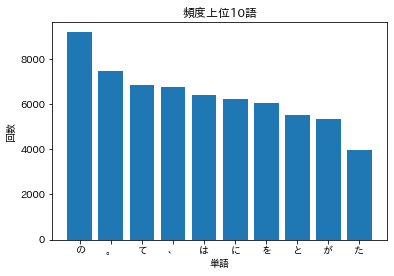

In [55]:
words = [word for word, _ in dist[:10]]
freqs = [freq for _, freq in dist[:10]]
plt.bar(words, freqs)
plt.title('頻度上位10語')
plt.xlabel('単語')
plt.ylabel('回数')